## Урок 3 

### Задание начального уровня

Потренируйтесь в нахождении матрицы схожести для валидационного сета

* загрузите `brand_tweets_valid.csv`
* примените объект `vectorizer`, обученный на датасете `brand_tweets.csv` (просто скопируйте этот код из урока)
* примените функцию `pairwise_distances` к полученной матрице

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import nltk

stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

def tokenizer(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

### YOUR CODE HERE ###
df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
vectorizer = CountVectorizer(tokenizer=tokenizer)
vectorizer = vectorizer.fit(df.tweet_text)

doc_matrix = vectorizer.transform(df_valid.tweet_text)

tweet_distance = pairwise_distances(doc_matrix, metric='cosine')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



### Задание среднего уровня

Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [35]:
import numpy as np

test_tweet_index = 14

print(df_valid.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')


### YOUR CODE HERE ###
sorted_similarity = np.argsort(tweet_distance[test_tweet_index, :])

df_valid.iloc[sorted_similarity[1:6]].tweet_text

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------



132    Apple employees just showed up in force to the...
16     #sxsw apple store run out for the day :( boo a...
341    Wanting in line at the unconfirmed Apple pop-u...
238    ZOMG RT @mention Special Apple store at #sxsw ...
357    Sitting on the ground waiting for my iPad at t...
Name: tweet_text, dtype: object

### Задание высокого уровня.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести.
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение.

In [37]:
tweet_distance

array([[0.        , 0.58166999, 0.8511125 , ..., 0.73273876, 0.78178211,
        0.71652665],
       [0.58166999, 0.        , 0.7923863 , ..., 0.49688471, 0.72613872,
        0.44660141],
       [0.8511125 , 0.7923863 , 0.        , ..., 0.81430466, 0.77257059,
        0.80304035],
       ...,
       [0.73273876, 0.49688471, 0.81430466, ..., 0.        , 0.74484482,
        0.55805826],
       [0.78178211, 0.72613872, 0.77257059, ..., 0.74484482, 0.        ,
        0.78349365],
       [0.71652665, 0.44660141, 0.80304035, ..., 0.55805826, 0.78349365,
        0.        ]])

<BarContainer object of 402 artists>

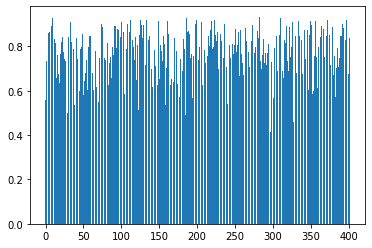

In [39]:
### YOUR CODE HERE ###
from matplotlib import pyplot as plt

%matplotlib inline

### YOUR CODE HERE ###

plt.bar(sorted_similarity, tweet_distance[test_tweet_index, :])

In [58]:
def find_similar_tweets(tweet_index, similar_coef, similar_matrix):
  return np.where((1-similar_matrix[tweet_index, 1:]) >= similar_coef)

find_similar_tweets(test_tweet_index, 0.5, tweet_distance)

(array([ 13,  15,  62, 131, 237, 340, 356]),)